# Src2
Example to illustrate high resolution peak searching function (class TSpectrum2).




**Author:**  Miroslav Morhac, Olivier Couet  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Wednesday, May 15, 2024 at 09:54 AM.</small></i>

In [1]:
const Int_t nbinsx = 256;
const Int_t nbinsy = 256;
std::vector<Double_t *> source(nbinsx), dest(nbinsx);
for (Int_t i = 0; i < nbinsx; i++) {
   source[i] = new Double_t[nbinsy];
   dest[i] = new Double_t[nbinsy];
}
TString dir = gROOT->GetTutorialDir();
TString file = dir + "/spectrum/TSpectrum2.root";
TFile *f = TFile::Open(file.Data());
gStyle->SetOptStat(0);
auto search = (TH2F *)f->Get("back3");
TSpectrum2 s;
for (Int_t i = 0; i < nbinsx; i++) {
   for (Int_t j = 0; j < nbinsy; j++) {
      source[i][j] = search->GetBinContent(i + 1, j + 1);
   }
}
Int_t nfound = s.SearchHighRes(source.data(), dest.data(), nbinsx, nbinsy, 2, 10, kTRUE, 10, kFALSE, 3);
printf("Found %d candidate peaks\n", nfound);
Double_t *PositionX = s.GetPositionX();
Double_t *PositionY = s.GetPositionY();
search->Draw("COL");
TMarker m;
m.SetMarkerStyle(23);
m.SetMarkerColor(kRed);
for (Int_t i = 0; i < nfound; i++) {
   printf("posx= %d, posy= %d, value=%d\n", (Int_t)(PositionX[i] + 0.5), (Int_t)(PositionY[i] + 0.5),
          (Int_t)source[(Int_t)(PositionX[i] + 0.5)][(Int_t)(PositionY[i] + 0.5)]);
   m.DrawMarker(PositionX[i], PositionY[i]);
}
for (Int_t i = 0; i < nbinsx; i++) {
   delete[] source[i];
   delete[] dest[i];
}

Found 5 candidate peaks
posx= 216, posy= 69, value=1502
posx= 191, posy= 188, value=1404
posx= 66, posy= 51, value=1555
posx= 109, posy= 100, value=1260
posx= 40, posy= 222, value=978


input_line_43:13:1: warning: 'search' shadows a declaration with the same name in the 'std' namespace; use '::search' to reference this declaration
auto search = (TH2F *)f->Get("back3");
^
Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


Draw all canvases 

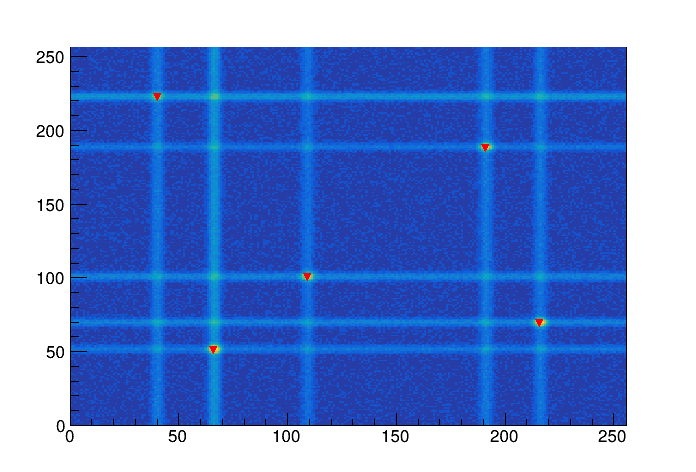

In [2]:
gROOT->GetListOfCanvases()->Draw()